In [1]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd


In [2]:
t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

array(['TAX1', 'TAX4', 'TAX7', ..., 'TAX10235', 'TAX10238', 'TAX10239'],
      dtype='<U8')

In [3]:
phylum_idx = 6
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][6:phylum_idx + 1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
# display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()

,AAA00108,AAA00405,AAA00507,AAA00607,AAA00806,AAA00910
Korarchaeum_cryptofilum,2.0,5.0,4.0,0.0,3.0,0.0
Prometheoarchaeum_syntrophicum,70.0,11.0,56.0,8.0,47.0,30.0
Mancarchaeum_acidiphilum,0.0,4.0,1.0,0.0,1.0,0.0
Micrarchaeum_sp.,0.0,2.0,3.0,0.0,1.0,0.0
Micrarchaeota_sp,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Gordonia_virus_Yvonnetastic,0.0,0.0,1.0,0.0,1.0,0.0
Siphoviridae_sp,8.0,2.0,23.0,13.0,7.0,8.0
Caudovirales_sp,0.0,0.0,0.0,0.0,0.0,20.0
Wuhan_heteroptera_virus_3,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# pct = col1.div(col1.sum(axis=0), axis=0)
# col1["AAA00108_pct"] = col1["AAA00108"] / col1["AAA00108"].sum()
# pct = pct.where(pct >= 0.10).dropna()
# display(pct.where(pct >= 0.001).dropna())
# col1_largest = pct.nlargest(10, 'AAA00108')
# display(col1_largest)

,Anaerobutyricum_hallii,Anaerostipes_hadrus,Blautia_obeum,Blautia_SC05B48,Blautia_sp,Coprococcus_catus,Coprococcus_comes,Faecalicatena_Marseille-Q4148,Ruminococcus_gnavus,Ruminococcus_torques,Roseburia_intestinalis,Lachnospiraceae_sp,Faecalibacterium_prausnitzii,Clostridioides_difficile,Eubacteriales_sp,Firmicutes_sp,Bacteria_sp,Unclassified_sp
AAA00108,0.039492,0.067546,0.011410,0.009916,0.003619,0.006948,0.016236,0.005923,0.057228,0.005187,0.009935,0.020633,0.005795,0.003714,0.009962,0.009147,0.007007,0.710302
AAA00405,0.030281,0.070055,0.011701,0.062565,0.003492,0.004374,0.035843,0.003812,0.015023,0.036771,0.008966,0.022220,0.004321,0.004896,0.013844,0.010372,0.006389,0.655074
AAA00507,0.004663,0.011597,0.005280,0.004202,0.001585,0.001419,0.002968,0.002562,0.011842,0.002745,0.001642,0.010167,0.009328,0.003753,0.007566,0.006168,0.009230,0.903285
AAA00607,0.071778,0.040325,0.011200,0.083110,0.002772,0.005032,0.051802,0.002350,0.008407,0.004113,0.007208,0.022840,0.013453,0.003255,0.010780,0.008651,0.005867,0.647058
AAA00806,0.053992,0.001592,0.010076,0.011710,0.003316,0.003916,0.005895,0.001969,0.007290,0.004213,0.009794,0.016881,0.031104,0.002156,0.006831,0.006474,0.005327,0.817463
AAA00910,0.022529,0.070531,0.010529,0.028382,0.002651,0.006853,0.010328,0.001555,0.002150,0.012950,0.007482,0.014452,0.035200,0.001429,0.008971,0.008486,0.006128,0.749393


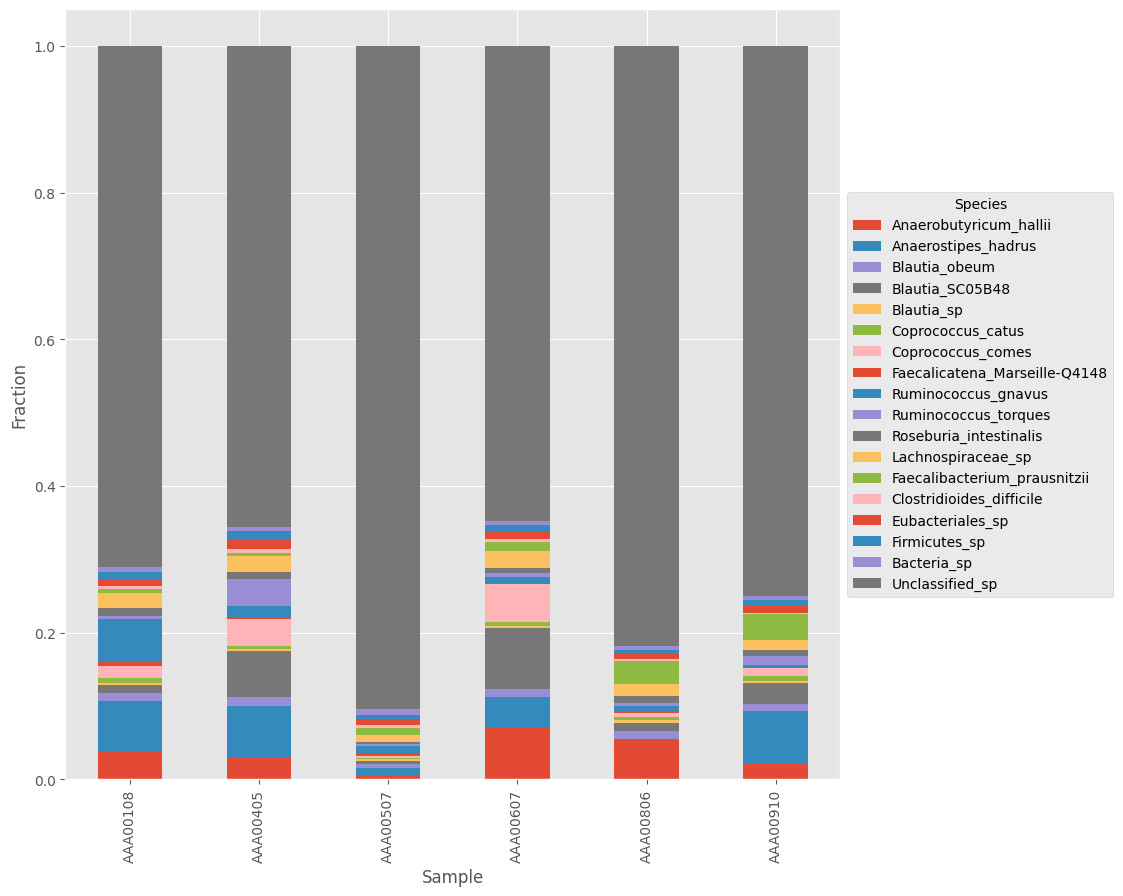

In [8]:
pct = col1.apply(lambda x: x / x.sum(), axis=0)
pct = pct.where(pct >= 0.001).dropna()
pct = pct.apply(lambda x: x / x.sum(), axis=0)
display(pct.T)

import matplotlib
matplotlib.style.use('ggplot') 
pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Species")